In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.feature_selection import *
from sklearn.svm import *
from sklearn.linear_model import *
from sklearn.ensemble import *

In [130]:
df = pd.read_csv("Australian Vehicle Prices.csv")

In [131]:
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


Brand, Year, Model, Title, UsedOrNew, Transmission, Engine, DriveType, FuelConsumption, Kilometres, CylindersinEngine -> Row is same -> Remove null values

In [132]:
null_index = df[df["Brand"].isna()].index[0]
null_index

2391

In [133]:
df_1 = df.drop(index=null_index)
df_1

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [134]:
df_2 = df_1.drop(columns=["Car/Suv","Title"])
df_2

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [135]:
for i in df_2.columns:
    df_2[i][df_2[i]=="-"] = np.nan

In [136]:
def retrieve_only_litres(x):
    x = str(x)
    if "cyl" in x and "L" in x:
        p = x.split(",")
        s = p[1].replace("L","").strip()
    elif "cyl" in x:
        s = np.nan
    elif "L" in x:
        s = x.replace("L","").strip()
    else:
        s = np.nan
    return s

In [137]:
def convert_to_km_l(x):
    x = str(x)
    p = x.split("/")
    litres = float(p[0].replace("L","").strip())
    km = float(p[1].replace("km","").strip())
    if litres == 0:
        return "delete"
    else:
        return round(km/litres,1)

In [138]:
df_3 = df_2.copy()

df_3["Engine"] = list(map(lambda x: retrieve_only_litres(x),df_2["Engine"]))
df_3["Engine"] = df_3["Engine"].astype("float64")

df_3["FuelConsumption"][df_3["FuelConsumption"].notna()] = list(map(lambda x: convert_to_km_l(x),df_2["FuelConsumption"][df_2["FuelConsumption"].notna()]))

fuel_cons_index = df_3[df_3["FuelConsumption"]=="delete"].index.values

df_3 = df_3.drop(index=fuel_cons_index)


In [139]:
df_4 = df_3.drop(columns="ColourExtInt")
df_4["Location"].unique()

array(['Caringbah, NSW', 'Brookvale, NSW', 'Sylvania, NSW',
       'Mount Druitt, NSW', 'Castle Hill, NSW', 'Saint Marys, NSW',
       'Blacktown, NSW', 'Wentworthville, NSW', 'Mcgraths Hill, NSW',
       'Lidcombe, NSW', 'Rouse Hill, NSW', 'Five Dock, NSW',
       'Haberfield, NSW', 'Cabramatta, NSW', 'Glebe, NSW', 'Camden, NSW',
       'Lansvale, NSW', 'Croydon, NSW', 'Pendle Hill, NSW',
       'Smithfield, NSW', 'Ingleburn, NSW', 'Seven Hills, NSW',
       'Granville, NSW', 'Minchinbury, NSW', 'Ryde, NSW', 'Homebush, NSW',
       'Elderslie, NSW', 'Campbelltown, NSW', 'Bankstown, NSW',
       'North Narrabeen, NSW', 'Chester Hill, NSW', 'Liverpool, NSW',
       'West Ryde, NSW', 'Kirrawee, NSW', 'Smeaton Grange, NSW',
       'Minto, NSW', 'Windsor, NSW', 'Penrith, NSW', 'Kogarah, NSW',
       'South Windsor, NSW', 'Artarmon, NSW', 'Arncliffe, NSW',
       'Darlinghurst, NSW', 'Eastern Creek, NSW', 'Rydalmere, NSW',
       'Carlton, NSW', 'Leichhardt, NSW', 'Punchbowl, NSW',
       '

In [140]:
def retrieve_state(x):
    x = str(x)
    p = x.split(",")
    state = p[1].strip()
    return state

In [141]:
df_5 = df_4.copy()
df_5["Location"][df_5["Location"].notna()] = list(map(lambda x: retrieve_state(x),df_4["Location"][df_4["Location"].notna()]))
df_5

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,2.2,AWD,Diesel,11.5,5595,NSW,4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,USED,Automatic,1.5,Front,Premium,14.9,16,NSW,4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,USED,Automatic,2.0,Rear,Premium,15.2,8472,NSW,4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,USED,Automatic,5.5,Rear,Premium,9.1,136517,NSW,8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,USED,Automatic,1.3,Front,Unleaded,16.7,1035,NSW,4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,USED,Automatic,NaN,Front,Unleaded,NaN,66000,QLD,NaN,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED,Automatic,NaN,Rear,Diesel,NaN,117432,VIC,NaN,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,DEMO,Automatic,1.6,Front,Unleaded,16.1,5165,QLD,4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,USED,Automatic,2.0,AWD,Premium,13.9,85525,QLD,4 cyl,SUV,4 Doors,5 Seats,41888


In [142]:
def retrieve_no_of_cylinders(x):
    x = str(x)
    p = re.findall("\d+",x)
    r = int(p[0])
    if r==0:
        return np.nan
    else:
        return r

def retrieve_no_of_doors(x):
    x = str(x)
    p = re.findall("\d+",x)
    r = int(p[0])
    q = re.findall("[a-zA-Z]+",x)
    s = q[0]
    if s=="Seats":
        if r<=8:
            r = 4
        else:
            r = 5
    return r

def retrieve_no_of_seats(x):
    x = str(x)
    p = re.findall("\d+",x)
    r = int(p[0])
    return r

df_6 = df_5.copy()

df_6["CylindersinEngine"][df_6["CylindersinEngine"].notna()] = list(map(lambda x:retrieve_no_of_cylinders(x),df_6["CylindersinEngine"][df_6["CylindersinEngine"].notna()]))

df_6["Doors"][df_6["Doors"].notna()] = list(map(lambda x:retrieve_no_of_doors(x),df_6["Doors"][df_6["Doors"].notna()]))

df_6["Seats"][df_6["Seats"].notna()] = list(map(lambda x:retrieve_no_of_seats(x),df_6["Seats"][df_6["Seats"].notna()]))

df_6

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,2.2,AWD,Diesel,11.5,5595,NSW,4,SUV,4,7,51990
1,MG,2022.0,MG3,USED,Automatic,1.5,Front,Premium,14.9,16,NSW,4,Hatchback,5,5,19990
2,BMW,2022.0,430I,USED,Automatic,2.0,Rear,Premium,15.2,8472,NSW,4,Coupe,2,4,108988
3,Mercedes-Benz,2011.0,E500,USED,Automatic,5.5,Rear,Premium,9.1,136517,NSW,8,Coupe,2,4,32990
4,Renault,2022.0,Arkana,USED,Automatic,1.3,Front,Unleaded,16.7,1035,NSW,4,SUV,4,5,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,USED,Automatic,NaN,Front,Unleaded,NaN,66000,QLD,NaN,Commercial,4,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED,Automatic,NaN,Rear,Diesel,NaN,117432,VIC,NaN,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,DEMO,Automatic,1.6,Front,Unleaded,16.1,5165,QLD,4,SUV,4,5,35280
16732,Mercedes-Benz,2016.0,GLC250,USED,Automatic,2.0,AWD,Premium,13.9,85525,QLD,4,SUV,4,5,41888


In [143]:
def perform_encoding(x,df):
    ctr = 0
    encode_dict = {}
    for i in df[x].unique():
        k = str(i)
        if k == "nan":
            continue
        encode_dict[i] = ctr
        ctr += 1
    return encode_dict
df_7 = df_6.copy()
cat_columns = ["Brand","Model","UsedOrNew","Transmission","DriveType","FuelType","Location","BodyType"]


for i in cat_columns:
    df_7[i][df_7[i].notna()] = df_6[i][df_6[i].notna()].map(perform_encoding(i,df_6[df_6[i].notna()])).astype("int64")
    df_7[i] = df_7[i].fillna(df_7[i].median())

In [150]:
cont_columns = ["Engine","FuelConsumption","Kilometres","Price"]
disc_columns = ["CylindersinEngine","Doors","Seats"]

In [173]:
df_8 = df_7.copy()
kilo = "- / -"
lp = []

for i in df_7.index:
    try:
        df_8.loc[i,"Kilometres"] = int(df_7.loc[i,"Kilometres"])
    except:
        df_8.loc[i,"Kilometres"] = np.nan

for i in df_7.index:
    try:
        df_8.loc[i,"Price"] = int(df_7.loc[i,"Price"])
    except:
        df_8.loc[i,"Price"] = np.nan

In [174]:
df_9 = df_8.copy()
df_9[cont_columns] = df_9[cont_columns].astype("float64")
for i in cont_columns:
    df_9[i][df_9[i].notnull()] = df_9[i][df_9[i].notnull()].fillna(df_8[i][df_8[i].notnull()].mean())
for i in disc_columns:
    df_9[i] = df_9[i].fillna(df_8[i].median())

In [179]:
df_10 = df_9.copy()
for i in cont_columns:
    df_10[i] = df_10[i].fillna(df_9[i].mean())

for i in cont_columns[0:2]:
    df_10[i] = df_10[i].round(1)
for i in cont_columns[2:4]:
    df_10[i] = df_10[i].round(0).astype("int64")

In [180]:
df_10

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,0,2022.0,0,0,0.0,2.2,0,0.0,11.5,5595,0.0,4.0,0.0,4.0,7.0,51990
1,1,2022.0,1,1,0.0,1.5,1,1.0,14.9,16,0.0,4.0,1.0,5.0,5.0,19990
2,2,2022.0,2,1,0.0,2.0,2,1.0,15.2,8472,0.0,4.0,2.0,2.0,4.0,108988
3,3,2011.0,3,1,0.0,5.5,2,1.0,9.1,136517,0.0,8.0,2.0,2.0,4.0,32990
4,4,2022.0,4,1,0.0,1.3,1,2.0,16.7,1035,0.0,4.0,0.0,4.0,5.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,5,2014.0,163,1,0.0,2.4,1,2.0,13.6,66000,2.0,4.0,3.0,4.0,5.0,29500
16730,3,2012.0,200,1,0.0,2.4,2,0.0,13.6,117432,1.0,4.0,1.0,4.0,5.0,39888
16731,23,2022.0,155,0,0.0,1.6,1,2.0,16.1,5165,2.0,4.0,0.0,4.0,5.0,35280
16732,3,2016.0,345,1,0.0,2.0,0,1.0,13.9,85525,2.0,4.0,0.0,4.0,5.0,41888


**Price prediction:** Predict the price of a car based on its features and location using machine learning models.<br><br>
**Market analysis:** Explore the market trends and demand for different types of cars in Australia using descriptive statistics and visualization techniques.<br><br>
**Feature analysis:** Identify the most important features that affect the car prices and how they vary across different brands, models, and locations using correlation and regression analysis.<br><br>

#### Price Prediction

In [182]:
X = df_10.drop(columns="Price")
y = df_10["Price"]

In [186]:
mms = MinMaxScaler()
X_res = pd.DataFrame(mms.fit_transform(X),columns=X.columns)
y_res = y.copy()

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=np.random.randint(0,1000))

In [189]:
len(X_train)

12267

In [197]:
f_regr = f_regression(X_train,y_train)
p_values = pd.DataFrame(columns=["feature","p-value"])
p_values["feature"] = X.columns.values
p_values["p-value"] = f_regr[1].round(2)
p_values

,feature,p-value
0,Brand,0.00
1,Year,0.00
2,Model,0.00
3,UsedOrNew,0.00
4,Transmission,0.00
5,Engine,0.00
6,DriveType,0.00
7,FuelType,0.00
8,FuelConsumption,0.00
9,Kilometres,0.00


In [199]:
ridge_regr = Ridge()
ridge_regr.fit(X_train,y_train)

Ridge()

In [200]:
linear_svr_regr = LinearSVR()
linear_svr_regr.fit(X_train,y_train)

LinearSVR()

In [201]:
svr_regr = SVR()
svr_regr.fit(X_train,y_train)

SVR()

In [202]:
rfr_regr = RandomForestRegressor()
rfr_regr.fit(X_train,y_train)

RandomForestRegressor()

In [203]:
y_pred_ridge = ridge_regr.predict(X_test)
y_pred_linear_svr = linear_svr_regr.predict(X_test)
y_pred_svr = svr_regr.predict(X_test)
y_pred_rfr = rfr_regr.predict(X_test)

In [205]:
y_pred_ridge

array([96648.71770032, 43407.64317953, 56876.17835914, ...,
       69355.41305346, 91430.06864637, 17767.43425239])

In [217]:
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge)).round(2)
rmse_linear_svr = np.sqrt(mean_squared_error(y_test,y_pred_linear_svr)).round(2)
rmse_svr = np.sqrt(mean_squared_error(y_test,y_pred_svr)).round(2)
rmse_rfr = np.sqrt(mean_squared_error(y_test,y_pred_rfr)).round(2)

In [218]:
rmse_dict = {
    rmse_ridge: "Ridge Regression",
    rmse_linear_svr: "Linear Support Vector Regression",
    rmse_svr: "Support Vector Regression",
    rmse_rfr: "Random Forest Regression"
}

In [219]:
rmse_min = min(list(rmse_dict.keys()))
rmse_dict[rmse_min]

'Random Forest Regression'

In [220]:
rmse_min

16971.58

<Axes: >

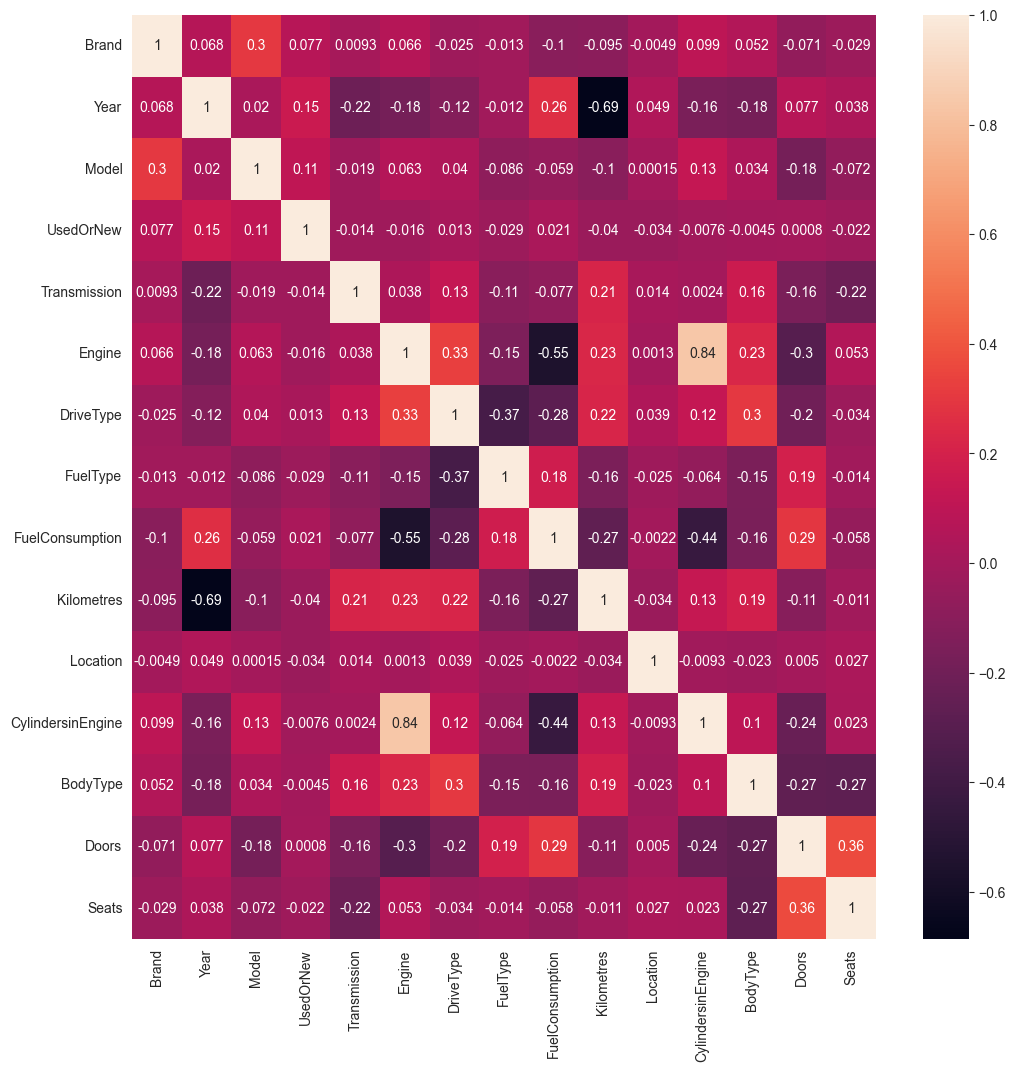

In [228]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(ax=ax,data=X.corr(),annot=True)

In [235]:
df_10.describe()

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
count,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,1.635600e+04
mean,12.549523,2016.248166,130.732514,1.035706,0.112558,2.396448,1.646980,1.231352,13.580643,99221.837369,1.385119,4.397897,2.148814,4.022989,5.102837,3.635618e+04
std,8.817900,5.090172,133.235482,0.308163,0.316061,0.812405,1.366357,0.938870,3.750128,75365.874705,1.560228,1.005290,2.395397,0.635414,1.007736,3.517862e+04
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,8.800000e+01
25%,5.000000,2013.000000,38.000000,1.000000,0.000000,2.000000,1.000000,0.000000,11.600000,42682.250000,0.000000,4.000000,0.000000,4.000000,5.000000,1.899900e+04
50%,11.000000,2017.000000,84.000000,1.000000,0.000000,2.400000,1.000000,1.000000,13.500000,88503.500000,1.000000,4.000000,1.000000,4.000000,5.000000,2.899900e+04
75%,16.000000,2020.000000,165.000000,1.000000,0.000000,2.700000,3.000000,2.000000,14.700000,143019.750000,2.000000,4.000000,5.000000,4.000000,5.000000,4.299500e+04
max,71.000000,2023.000000,731.000000,2.000000,1.000000,6.800000,4.000000,7.000000,62.500000,533849.000000,7.000000,12.000000,9.000000,5.000000,14.000000,1.500000e+06


In [257]:
df_10["Price"].mean() 

36356.18335778919

In [254]:
36356 AUD = 24463 USD

{'SUV': 0,
 'Hatchback': 1,
 'Coupe': 2,
 'Commercial': 3,
 'Wagon': 4,
 'Ute / Tray': 5,
 'Sedan': 6,
 'People Mover': 7,
 'Convertible': 8,
 'Other': 9}